# **CONVOLUTION NEURAL NETWORK**


### **CONSTRUCTING THE LAYERS AND PREDICTING THE IMAGE CLASSES.**

## **Importing the Python Modules.** 

Importing the necessary python environments to work with.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline 

from keras.datasets  import mnist     # MNIST dataset is included in Keras
from keras. models import Sequential  # Model type to be used

from keras.layers.core import Dense, Dropout, Activation # Types of layers to be used in our model
from keras.utils import np_utils                         # Numpy related tool

## **Loading Training Data**

The MINIST dataset is analysed within keras.

The MNIST data is split between 60,000 28 x 28 pixel training images and 10,00

In [ ]:

(X_train, y_train),(X_test,y_test)= mnist.load_data()

print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)


X_train (60000, 28, 28)
y_train (60000,)
X_test (10000, 28, 28)
y_test (10000,)


## **Plotting the samples images in MNIST.**

Some sample images from the training set is plotted using matplotlib.



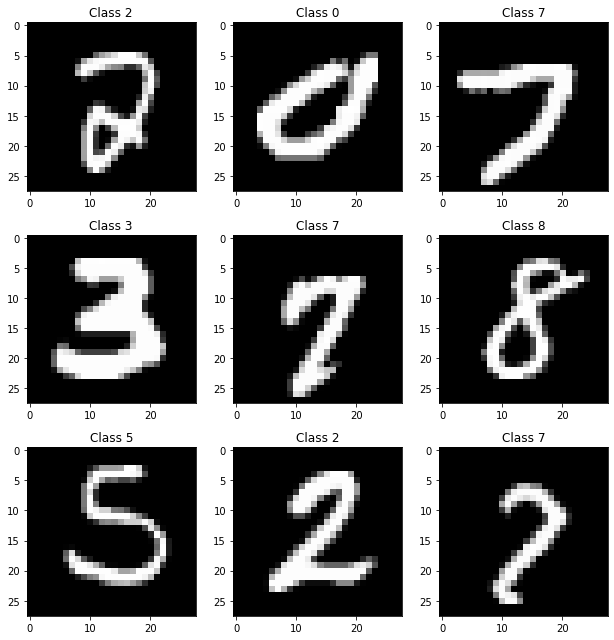

In [ ]:
plt.rcParams['figure.figsize']=(9,9)

for i in range(9):
  plt.subplot(3,3,i+1)
  num = random.randint(0, len(X_train))
  plt.imshow(X_train[num],cmap='gray', interpolation='none')
  plt.title("Class {}".format(y_train[num]))
  plt.tight_layout()

## **Printing the random image of MNIST dataset in Matrix format.**

Creating a function **matprint** that generates the matrix for the image chosen.

In [ ]:
#just a little function for pretty printing a matrix

def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")
# now print!        
matprint(X_train[num])

0  0  0  0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0   0    0    0    0   57  184  195  133  122    5    0    0    0   0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0   0    0    0  118  237  252  252  253  252  185   48    0    0   0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0   0    0   63  234  252  236  216  236  252  252  165   11    0   0  0  0  0  0  0  0  
0

## **Reshaping the size of training and testing .**

The entire MNIST dataset consist 60,000 images and each image's pixel size is 28X28 (784 pixcels) which flattened into vector(1 dimensional).

For training, the entire dataset is taken into account whereas to testing the data 10,000 data gets flattened.    

In [ ]:
X_train = X_train.reshape(60000, 784)  # reshape 60,00 28X 28 matrices into 60,000 784-length vectors.
X_test = X_test.reshape(10000, 784)    # reshape 10,00 28X 28 matrices into 10,000 784-length vectors.

X_train = X_train.astype('float32')  #Change intergers to 32-bit floating point
X_test = X_test.astype('float32')



## **Normalizing pixel values.** 

Normalizing the train and test dataset by dividing it with 225. 

Our idea is to normalize the input in the range [0,1] rather than [0-255]. 



In [ ]:
X_train /=255    # normalize each value for pixel
X_test /=255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training martix shape (60000, 784)
Testing martix shape (10000, 784)


## **Modifying the classes (unique digits) into one-hot format.**

0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0]

1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]

2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0]
etc.

### **Comparing final output with the classes.**

If the final output is very close to one of these classes, then it is most likely that class. 

For example, if the final output is:
[0, 0, 0, 0, 0.94, 0, 0.06, 0, 0]
then it's most likely the image of digit 4.

In [ ]:
nb_classes = 10  # NO of unique nos

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)


## **DESIGNING NETWORK** 

## **Building Layers to the Network.**

Building the layer through the functin **Sequential()**


In [ ]:
# Sequenctial Model is a linear stack of layers and is very common

model=Sequential()

## **First Hidden Layer**.

**Dense()** - refers to fully connected layer with the preceding layer in the network.

Here, the first layer has 512 nodes(neurons) for they are densed in nature.

In [ ]:
# The first hidden layer is a set of 512 nodes (AN)
# Each node will receive an element from each input vector and apply some we

model.add(Dense(512, input_shape=(784,)))   # (784,)is not a typo  that represents

## **Introducing Activation Function.**

An "activation" is a non-linear fuction applied to the output of the layer.


*   It checks the new value of node and then decides.
*   The activation function function performed here is "relu" which takes the negative values as zero and the positive values remains the same. 




In [ ]:
# It checks the new value of the node, and decides whether that artifical neuron has fired.
# The Rectified Linear Unit (ReLU) converts all negative inputs to nodes in the next layer to be zero.
# Those inputs are then not considered to be fired.
# Positive values of a node are unchanged.
 

model.add(Activation('relu'))

## **Droupout**

Here, 20% odf data is droped out,

The dropout layer is responsible for randomly skipping the neurons inside the neural network so that the overall odds of overfitting are reduced optimally.


In [ ]:
model.add(Dropout(0.2))   # normal Dropout range be 0.1 to 0.5
# learning will not be memorised 

## **Adding the second hidden layer**

Dense() - dense layer contains densely connected neurons. 

The neurons in the dense layer get their source of input data from all the other neurons of the previous layer of the network.

The procedure for layer building follws.

*   BatchNormalization()
*   Activation('relu')


In [ ]:
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

In [ ]:
model.add(Dense(10))

## **Applying the Activation Function.**

Applying softmax to the final layer.

The softmax activation represents a probability distribution over k

The softmax function highlights the largest values and suppresses values which are significantly below the maximum value, though this is not true for small values.

It normalizes the outputs so that they sum to 1 so that they can be directly treated as probabilities over the output.



In [ ]:


model.add(Activation('softmax'))

till this the network is ready.

## **Model Summary**

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5

## **Compiling the model.**

  **Categorical crossentropy**- loss function used in multi-class classification tasks.

  These are tasks can only belong to one out of many possible categories, and model will decide which one to choose.

  It is designed to quantify the difference between two probability distributions.

  **Fixing the Optimizer** - Adam that holds the learning rate for the model.



In [ ]:
# Let's use the Adam optimizer for learning

model.compile(loss = 'categorical_crossentropy',

              optimizer = 'adam', metrics=['accuracy'])

## **Training the model.**

In [ ]:
model.fit(X_train, Y_train, 

          batch_size = 128, epochs = 10,

          verbose = 1)

Epoch 1/10
469/469 [==============================] - 8s 17ms/step - loss: 0.2466 - accuracy: 0.9273
Epoch 2/10
469/469 [==============================] - 8s 16ms/step - loss: 0.1020 - accuracy: 0.9689
Epoch 3/10
469/469 [==============================] - 12s 25ms/step - loss: 0.0708 - accuracy: 0.9780
Epoch 4/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0573 - accuracy: 0.9821
Epoch 5/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0449 - accuracy: 0.9855
Epoch 6/10
469/469 [==============================] - 8s 16ms/step - loss: 0.0397 - accuracy: 0.9872
Epoch 7/10
469/469 [==============================] - 8s 16ms/step - loss: 0.0328 - accuracy: 0.9890
Epoch 8/10
469/469 [==============================] - 8s 16ms/step - loss: 0.0305 - accuracy: 0.9899
Epoch 9/10
469/469 [==============================] - 8s 16ms/step - loss: 0.0262 - accuracy: 0.9913
Epoch 10/10
469/469 [==============================] - 8s 16ms/step - loss: 0.0261 - accur

## **Evaluating the Test Score and Test Accuracy.**

In [ ]:
score = model.evaluate(X_test,Y_test)
print("test score:",score[0])
print("test accuracy:",score[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.0669 - accuracy: 0.9809
test score: 0.06691257655620575
test accuracy: 0.98089998960495


## **Predicting Class Function.**

argmax-

In [ ]:
#  The predict_classes function 

# according to the trained classifier for each input example

predict_x = model.predict(X_test)

predict_classes = np.argmax(predict_x, axis = 1)

predict_x





313/313 [==============================] - 1s 4ms/step


array([[5.30616089e-12, 1.90500307e-11, 4.20595720e-12, ...,
        9.99999940e-01, 1.51749707e-12, 4.90700869e-10],
       [3.74580185e-12, 2.47525531e-06, 9.99997437e-01, ...,
        1.41149620e-10, 8.34426928e-09, 1.98860228e-16],
       [9.67552358e-11, 9.99997437e-01, 1.90465990e-08, ...,
        7.75327464e-07, 1.45411627e-06, 1.58439806e-11],
       ...,
       [1.93312285e-13, 5.47463047e-11, 4.12623524e-16, ...,
        1.33425315e-08, 6.95181068e-09, 2.69765188e-08],
       [3.54275615e-12, 4.21819274e-15, 7.46440691e-16, ...,
        4.86133926e-14, 5.36393429e-07, 4.33615275e-14],
       [1.26001423e-11, 1.02856525e-13, 1.39834040e-13, ...,
        7.14940012e-17, 1.17756804e-09, 7.30393935e-13]], dtype=float32)

In [ ]:
predict_classes

array([7, 2, 1, ..., 4, 5, 6])

## **Checking for the correctness of classification.**

In [ ]:
# Check with items we got right / wrong

correct_indices = np.nonzero(predict_classes == y_test)[0]



incorrect_indices = np.nonzero(predict_classes != y_test)[0]

In [ ]:
correct_indices

array([   0,    1,    2, ..., 9997, 9998, 9999])

In [ ]:
incorrect_indices

array([ 149,  247,  321,  362,  445,  447,  449,  495,  582,  646,  684,
        691,  720,  874,  924,  938,  947,  951,  956, 1014, 1039, 1112,
       1156, 1178, 1182, 1192, 1226, 1232, 1242, 1247, 1260, 1299, 1319,
       1393, 1402, 1414, 1522, 1530, 1549, 1554, 1609, 1670, 1678, 1681,
       1722, 1754, 1790, 1865, 1878, 1901, 1941, 2004, 2024, 2035, 2044,
       2053, 2093, 2109, 2130, 2135, 2293, 2387, 2406, 2414, 2422, 2462,
       2488, 2582, 2597, 2607, 2648, 2654, 2720, 2743, 2863, 2877, 2921,
       2939, 2953, 2979, 2995, 3005, 3021, 3060, 3073, 3225, 3422, 3474,
       3475, 3503, 3520, 3558, 3559, 3597, 3681, 3702, 3776, 3780, 3796,
       3808, 3817, 3818, 3853, 3893, 3906, 3941, 3968, 3985, 4078, 4163,
       4176, 4224, 4248, 4289, 4350, 4360, 4369, 4477, 4497, 4504, 4534,
       4536, 4615, 4639, 4740, 4807, 4823, 4860, 4880, 5086, 5331, 5457,
       5642, 5676, 5734, 5842, 5870, 5887, 5936, 5955, 5973, 6023, 6059,
       6166, 6555, 6568, 6571, 6574, 6597, 6632, 67

## **Plotting and Observing the classes and predictions of the classes.**

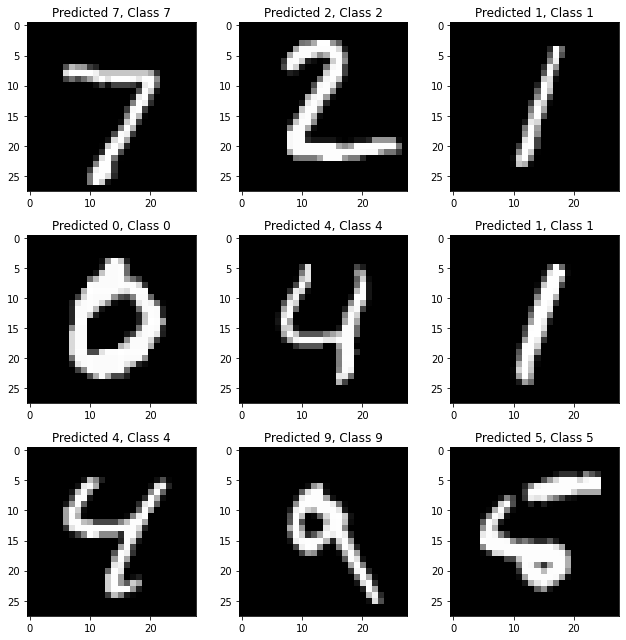

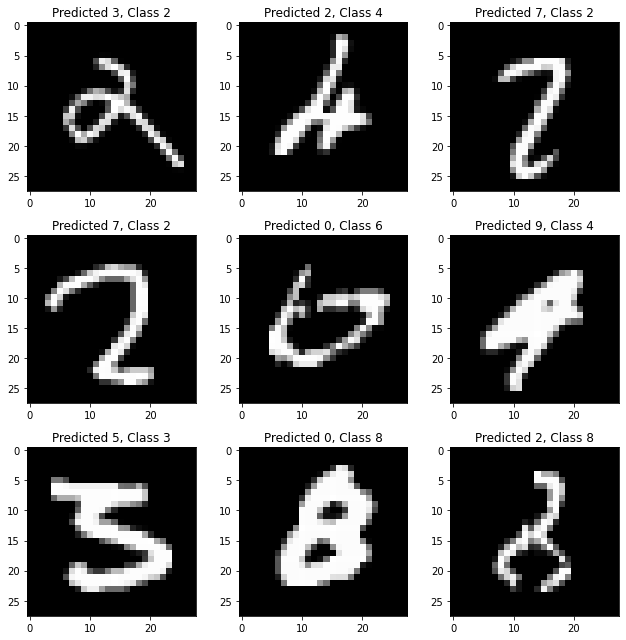

In [ ]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
  plt.subplot(3,3,i+1)
  plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
  plt.title("Predicted {}, Class {}".format(predict_classes[correct], y_test[correct]))
plt.tight_layout()
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
  plt.subplot(3,3,i+1)
  plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
  plt.title("Predicted {}, Class {}".format(predict_classes[incorrect], y_test[incorrect]))
plt.tight_layout()

It's found that out of 18 images 9 are correctly predicted and 9 are incorrectly predicted.

As the number of correct prediction classes is lesser, futhermore we increase the layers to observe the count of correct prediction.

For increasing the correct prediction rate, we will increase the number of layers in the model.